In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
file_names = []
for i in range(1, 11):
    item = 'load_stimulus_exp{}.csv'.format(i)
    file_names.append(item)

folder_path = os.path.abspath(os.path.join("../datasets"))
load_stimulus_global = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    load_stimulus_global = pd.concat([load_stimulus_global, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'load_stimulus_global.csv')
load_stimulus_global.to_csv(abs_path, index=False)


In [19]:
current_dir = os.getcwd()

exp_ls = "load_stimulus_global.csv"
#exp_ls="load_stimulus_exp1.csv"
file_path = os.path.abspath(os.path.join("..\\datasets", exp_ls))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1780 entries, 0 to 177
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          1780 non-null   float64
 1   output_rate                         1780 non-null   float64
 2   latency                             1780 non-null   float64
 3   flow_tracker_instructions           1780 non-null   float64
 4   nf_router_instructions              1780 non-null   float64
 5   ndpi_stats_instructions             1780 non-null   float64
 6   payload_scan_instructions           1780 non-null   float64
 7   flow_tracker_branches               1780 non-null   float64
 8   nf_router_branches                  1780 non-null   float64
 9   ndpi_stats_branches                 1780 non-null   float64
 10  payload_scan_branches               1780 non-null   float64
 11  flow_tracker_branch-misses          1780 non

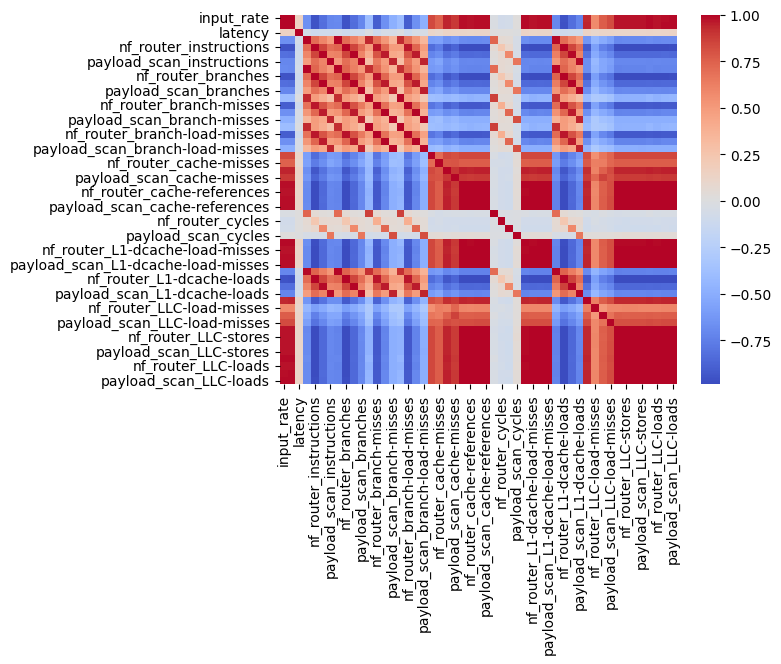

In [20]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [21]:
# Reset the index starting from 0
data = data.reset_index(drop=True)
data

input_rate  output_rate  latency  flow_tracker_instructions  \
0     259.121858   255.515746    7.888               1.021072e+10   
1     517.469159   528.243038    6.710               1.033159e+10   
2     528.213633   528.228905    5.757               1.024520e+10   
3     528.242283   528.272311    5.837               1.031562e+10   
4     528.332488   528.290939    5.754               9.702069e+09   
...          ...          ...      ...                        ...   
1775  528.080082   528.113201    7.846               1.034519e+10   
1776  528.248837   528.273710    5.540               1.031628e+10   
1777  528.203807   528.200379    6.042               1.039373e+10   
1778  528.534056   528.502355    5.741               1.039630e+10   
1779  528.348627   528.357503    8.407               1.039776e+10   

      nf_router_instructions  ndpi_stats_instructions  \
0               1.082196e+10             1.104096e+10   
1               1.092783e+10             1.115970e+10   
2               1.101796e+10             1.105603e+10   
3               1.101988e+10             1.114663e+10   
4               1.101924e+10             1.114919e+10   
...                      ...                      ...   
1775            1.101422e+10             1.118750e+10   
1776            1.102181e+10             1.118884e+10   
1777            1.100967e+10             1.127756e+10   
1778            1.101523e+10             1.127309e+10   
1779            1.093847e+10             1.127369e+10   

      payload_scan_instructions  flow_tracker_branches  nf_router_branches  \
0                  1.110005e+10           2.003502e+09        2.145465e+09   
1                  1.125849e+10           2.020975e+09        2.158760e+09   
2                  1.090428e+10           2.008676e+09        2.145051e+09   
3                  1.113588e+10           2.017262e+09        2.160228e+09   
4                  1.116529e+10           1.873756e+09        2.160103e+09   
...                         ...                    ...                 ...   
1775               1.126343e+10           2.023238e+09        2.158770e+09   
1776               1.117134e+10           2.006375e+09        2.160696e+09   
1777               1.105760e+10           2.015713e+09        2.170278e+09   
1778               1.118258e+10           2.007683e+09        2.171162e+09   
1779               1.135015e+10           2.029286e+09        2.159925e+09   

      ndpi_stats_branches  ...  ndpi_stats_LLC-load-misses  \
0            2.187973e+09  ...                       750.0   
1            2.202906e+09  ...                       709.0   
2            2.187267e+09  ...                       525.0   
3            2.200344e+09  ...                      1215.0   
4            2.187463e+09  ...                       770.0   
...                   ...  ...                         ...   
1775         2.209094e+09  ...                       388.0   
1776         2.196019e+09  ...                       778.0   
1777         2.207425e+09  ...                       351.0   
1778         2.196824e+09  ...                       709.0   
1779         2.221126e+09  ...                       600.0   

      payload_scan_LLC-load-misses  flow_tracker_LLC-stores  \
0                           1324.0                 430519.0   
1                            889.0                 432318.0   
2                            838.0                 431838.0   
3                           2202.0                 447939.0   
4                            880.0                 431741.0   
...                            ...                      ...   
1775                        1100.0                 432865.0   
1776                         778.0                 432731.0   
1777                         838.0                 441696.0   
1778                         598.0                 436146.0   
1779                         400.0                 438094.0   

      nf_router_LLC-stores  ndpi_stats_LLC-stores  pa

<Axes: >

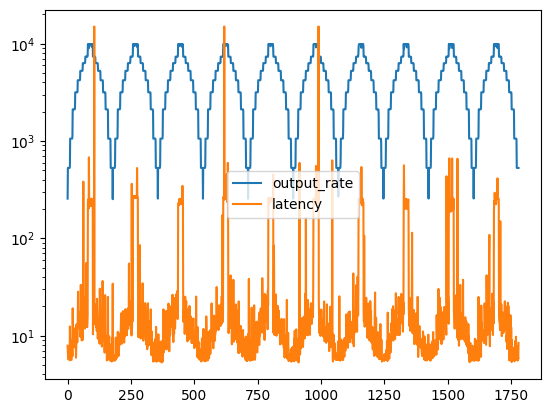

In [22]:
data.iloc[:, 1:3].plot(logy=True)

In [23]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and output_rate: 1.00
Correlation between output_rate and input_rate: 1.00
Correlation between output_rate and payload_scan_LLC-loads: 0.99
Correlation between output_rate and flow_tracker_L1-dcache-load-misses: 0.99
Correlation between output_rate and flow_tracker_LLC-loads: 0.99
Correlation between output_rate and ndpi_stats_LLC-loads: 0.99
Correlation between output_rate and payload_scan_cache-references: 0.98
Correlation between output_rate and ndpi_stats_cache-references: 0.98
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.98
Correlation between output_rate and flow_tracker_cache-references: 0.98
Correlation between output_rate and ndpi_stats_L1-dcache-load-misses: 0.98
Correlation between output_rate and ndpi_stats_LLC-stores: 0.97
Correlation between output_rate and nf_router_LLC-loads: 0.97
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.97
Correlation between output_rate and nf_router_cache-refer

In [24]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between latency and latency: 1.00
Correlation between latency and input_rate: 0.14
Correlation between latency and output_rate: 0.14
Correlation between latency and flow_tracker_LLC-load-misses: 0.14
Correlation between latency and ndpi_stats_cache-misses: 0.13
Correlation between latency and flow_tracker_L1-dcache-load-misses: 0.12
Correlation between latency and payload_scan_LLC-loads: 0.12
Correlation between latency and payload_scan_cache-misses: 0.12
Correlation between latency and ndpi_stats_LLC-loads: 0.12
Correlation between latency and flow_tracker_LLC-loads: 0.12
Correlation between latency and payload_scan_cache-references: 0.12
Correlation between latency and ndpi_stats_cache-references: 0.12
Correlation between latency and flow_tracker_cache-references: 0.12
Correlation between latency and payload_scan_L1-dcache-load-misses: 0.12
Correlation between latency and ndpi_stats_L1-dcache-load-misses: 0.12
Correlation between latency and payload_scan_LLC-load-misses: 

# Resource stimulus

In [25]:
resouce_stimulus_global = pd.DataFrame()
file_names = []

for i in range(3, 10):
    for j in [1,3]:
        for k in range(1,6):
            item = 'resource_stimulus_exp-{}-{}-{}.csv'.format(i,j,k)
            file_names.append(item)
            

print(file_names)
folder_path = os.path.abspath(os.path.join("../datasets"))
resource_stimulus_global = pd.DataFrame()

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    resource_stimulus_global = pd.concat([resource_stimulus_global, df], ignore_index=True)

# Save the combined DataFrame as a new CSV file
abs_path = os.path.join("..\\datasets", 'resource_stimulus_global.csv')
resource_stimulus_global.to_csv(abs_path, index=False)

['resource_stimulus_exp-3-1-1.csv', 'resource_stimulus_exp-3-1-2.csv', 'resource_stimulus_exp-3-1-3.csv', 'resource_stimulus_exp-3-1-4.csv', 'resource_stimulus_exp-3-1-5.csv', 'resource_stimulus_exp-3-3-1.csv', 'resource_stimulus_exp-3-3-2.csv', 'resource_stimulus_exp-3-3-3.csv', 'resource_stimulus_exp-3-3-4.csv', 'resource_stimulus_exp-3-3-5.csv', 'resource_stimulus_exp-4-1-1.csv', 'resource_stimulus_exp-4-1-2.csv', 'resource_stimulus_exp-4-1-3.csv', 'resource_stimulus_exp-4-1-4.csv', 'resource_stimulus_exp-4-1-5.csv', 'resource_stimulus_exp-4-3-1.csv', 'resource_stimulus_exp-4-3-2.csv', 'resource_stimulus_exp-4-3-3.csv', 'resource_stimulus_exp-4-3-4.csv', 'resource_stimulus_exp-4-3-5.csv', 'resource_stimulus_exp-5-1-1.csv', 'resource_stimulus_exp-5-1-2.csv', 'resource_stimulus_exp-5-1-3.csv', 'resource_stimulus_exp-5-1-4.csv', 'resource_stimulus_exp-5-1-5.csv', 'resource_stimulus_exp-5-3-1.csv', 'resource_stimulus_exp-5-3-2.csv', 'resource_stimulus_exp-5-3-3.csv', 'resource_stimulus_

In [26]:
current_dir = os.getcwd()

exp_rs = "resource_stimulus_global.csv"

file_path = os.path.abspath(os.path.join("..\\datasets", exp_rs))

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 0 to 45
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          3193 non-null   float64
 1   output_rate                         3193 non-null   float64
 2   latency                             3193 non-null   float64
 3   flow_tracker_instructions           3193 non-null   float64
 4   nf_router_instructions              3193 non-null   float64
 5   ndpi_stats_instructions             3193 non-null   float64
 6   payload_scan_instructions           3193 non-null   float64
 7   flow_tracker_branches               3193 non-null   float64
 8   nf_router_branches                  3193 non-null   float64
 9   ndpi_stats_branches                 3193 non-null   float64
 10  payload_scan_branches               3193 non-null   float64
 11  flow_tracker_branch-misses          3193 non-

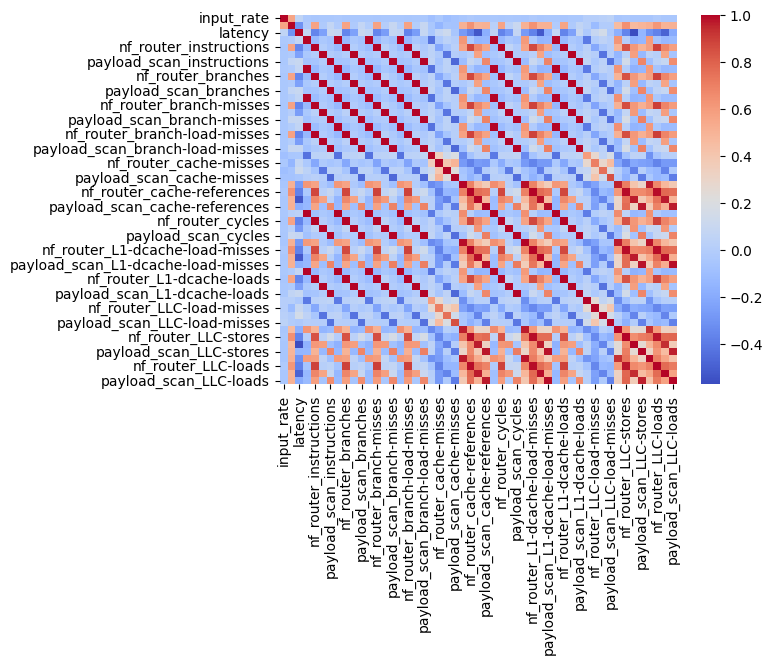

In [27]:
# heatmap
import seaborn as sns   
corr = data.corr()
plt.figure()
sns.heatmap(corr, cmap="coolwarm", annot=False, fmt=".2f")
plt.show()

In [28]:
# Reset the index starting from 0
data = data.reset_index(drop=True)
data

input_rate  output_rate  latency  flow_tracker_instructions  \
0      514.984312   493.682195    8.301               9.868857e+09   
1     2021.402870  2110.140952   10.601               9.862024e+09   
2     2113.002625  2109.994991   13.638               9.857808e+09   
3     2113.109852  2109.752834   14.406               9.859990e+09   
4     2113.026450  2110.354079    7.891               9.849631e+09   
...           ...          ...      ...                        ...   
3188  2113.293154  2111.298861    9.591               9.667416e+09   
3189  2113.049313  2111.153253   13.210               9.635269e+09   
3190  2113.180067  2110.605109   18.756               9.746806e+09   
3191  2113.435416  2111.800093   12.995               9.614415e+09   
3192  2113.074658  2110.319469   16.653               9.651854e+09   

      nf_router_instructions  ndpi_stats_instructions  \
0               9.623662e+09             1.046023e+10   
1               9.620704e+09             1.042154e+10   
2               9.621680e+09             1.033306e+10   
3               9.611272e+09             1.023305e+10   
4               9.605713e+09             1.033357e+10   
...                      ...                      ...   
3188            9.606674e+09             1.023537e+10   
3189            9.583265e+09             1.035370e+10   
3190            9.571641e+09             1.021714e+10   
3191            9.587266e+09             1.022814e+10   
3192            9.364939e+09             1.033817e+10   

      payload_scan_instructions  flow_tracker_branches  nf_router_branches  \
0                  1.056389e+10           1.896290e+09        1.882053e+09   
1                  1.068475e+10           1.906271e+09        1.886158e+09   
2                  1.077132e+10           1.917489e+09        1.897531e+09   
3                  1.078422e+10           1.918437e+09        1.896320e+09   
4                  1.077866e+10           1.917022e+09        1.896356e+09   
...                         ...                    ...                 ...   
3188               1.056876e+10           1.890821e+09        1.869741e+09   
3189               1.077065e+10           1.886708e+09        1.891459e+09   
3190               1.076569e+10           1.902242e+09        1.890127e+09   
3191               1.077716e+10           1.882756e+09        1.891776e+09   
3192               1.077598e+10           1.888130e+09        1.861164e+09   

      ndpi_stats_branches  ...  ndpi_stats_LLC-load-misses  \
0            2.065721e+09  ...                      1901.0   
1            2.053928e+09  ...                      2959.0   
2            2.041298e+09  ...                      2658.0   
3            2.027025e+09  ...                      3186.0   
4            2.042039e+09  ...                      2001.0   
...                   ...  ...                         ...   
3188         2.027000e+09  ...                      2484.0   
3189         2.044431e+09  ...                      2174.0   
3190         2.023834e+09  ...                      1851.0   
3191         2.025915e+09  ...                      1834.0   
3192         2.039254e+09  ...                      1813.0   

      payload_scan_LLC-load-misses  flow_tracker_LLC-stores  \
0                           1238.0                1624069.0   
1                           1890.0                1602950.0   
2                           1976.0                1609449.0   
3                           3326.0                1612689.0   
4                           2766.0                1610219.0   
...                            ...                      ...   
3188                        1863.0                1583374.0   
3189                        1763.0                1605902.0   
3190                        3134.0                1589433.0   
3191                        2888.0                1591865.0   
3192                        2015.0                1597163.0   

      nf_router_LLC-stores  ndpi_stats_LLC

<Axes: >

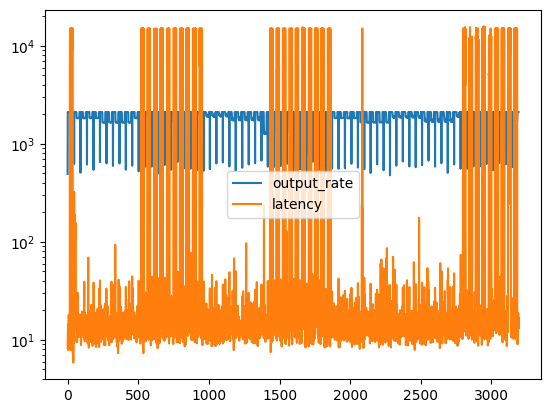

In [29]:
data.iloc[:, 1:3].plot(logy=True)

In [30]:
corr = data.corr()
correlation_list = []
for i in range(1,2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and nf_router_LLC-stores: 0.64
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.63
Correlation between output_rate and nf_router_cache-references: 0.63
Correlation between output_rate and nf_router_LLC-loads: 0.62
Correlation between output_rate and nf_router_branch-misses: 0.57
Correlation between output_rate and nf_router_branch-load-misses: 0.57
Correlation between output_rate and nf_router_cycles: 0.57
Correlation between output_rate and nf_router_instructions: 0.57
Correlation between output_rate and nf_router_branches: 0.56
Correlation between output_rate and nf_router_L1-dcache-loads: 0.56
Correlation between output_rate and flow_tracker_LLC-loads: 0.51
Correlation between output_rate and payload_scan_cache-references: 0.51
Correlation between output_rate and flow_tracker_L1-dcache-load-misses: 0.51
Correlation between output_rate and ndpi_stats_L1-dcache-load-misses: 0.51
Correlation between output_rate and payload_scan_L1-d